In [1]:
#Определение зависимости изменения размеров на изображениии с изменением высоты 
#импорт библиотек 
import os
import cv2
import math
import numpy as np
from imutils import perspective
# список наменований изображений, где название - расстояние от камеры до объекта
jpglist = ['367.jpg', '470.jpg', '561.jpg', '665.jpg', '765.jpg', '875.jpg',
          '966.jpg', '1065.jpg', '1160.jpg', '1264.jpg', '1370.jpg', '1472.jpg',
          '1569.jpg', '1673.jpg', '1777.jpg', '1877.jpg', '1977.jpg', '2067.jpg']
# Периметры 
ar_per = []
for i in jpglist: 
    # детектор обнаружения маркера Aruco
    parameters = cv2.aruco.DetectorParameters_create()
    aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_ARUCO_ORIGINAL)

    # загрузка изображения и изменение размера 
    img = cv2.imread(i)
    scale = 1.6
    wP = int(1006 // scale)
    hP = int(1603 // scale)
    pd = 0
    img = img[pd:img.shape[0] - pd, pd:img.shape[1] - pd]

    # Извлечение координат углов и индентификатора маркера Aruco
    corners, ids, _ = cv2.aruco.detectMarkers(img, aruco_dict, parameters=parameters)

    # Координаты внешних углов каждого маркера Aruco 
    bg = np.array([[corners[2][0][0][0], corners[2][0][0][1]],
                   [corners[3][0][0][0], corners[3][0][0][1]],
                   [corners[1][0][1][0], corners[1][0][1][1]],
                   [corners[0][0][3][0], corners[0][0][3][1]]])  
    bg = perspective.order_points(bg) # сортируем координаты по часовой стрелке 
    bg = np.int0(bg)
    
    
    #перспективное преобразование, P и H фактические стороны внешнего прямоугольника в мм
    def warpImg(img, bg, P=1603, H=1006):
        box = perspective.order_points(bg) # сортируем координаты по часовой стрелке          
        pts1 = np.float32(box) #точки для исходного изображения
        pts2 = np.float32([[0, 0], [P, 0], [P, H], [0, H]]) #точки для преобразования,P-ширина, H - высота
        matrix = cv2.getPerspectiveTransform(pts1, pts2) #  перспективное преобразование
        imgWarp = cv2.warpPerspective(img, matrix, (P, H)) # применить перспективное преобразование на изображение
        #imgWarp = cv2.resize(imgWarp, (0, 0), fx = 1.357, fy = 1.357)
        return imgWarp
    
    imgWarp = warpImg(img, bg, P= hP, H= wP)
    
    # детектор обнаружения маркера DICT_4X4_100 Aruco
    parameters = cv2.aruco.DetectorParameters_create()
    aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_100)
    # Извлечение координат углов и индентификатора маркера Aruco
    corners, idss, _ = cv2.aruco.detectMarkers(imgWarp, aruco_dict, parameters=parameters)

    # Координаты углов маркера Aruco 
    sg = np.array([[corners[0][0][0][0], corners[0][0][0][1]],
                   [corners[0][0][1][0], corners[0][0][1][0]],
                   [corners[0][0][2][0], corners[0][0][2][1]],
                   [corners[0][0][3][0], corners[0][0][3][1]]])  
    sg = perspective.order_points(sg) # сортируем координаты по часовой стрелке 
    sg = np.int0(sg)
            
    # Периметр внешнего многоугольника по внешним точкам каждого маркера
    ar_per1 = int(cv2.arcLength(sg, True))
    ar_per.append(ar_per1)

# Коэффициент корректировки преобразования
# Периметр внешнего многоугольника по внешним точкам каждого маркера
aruco_perimeter = cv2.arcLength(bg, True)
# Периметр рамки изображения imgWarp
pp = imgWarp.shape[1]*2 + imgWarp.shape[0]*2
rect2 = cv2.minAreaRect(bg)
(x2, y2), (w2, h2), angle = rect2

kf = pp/aruco_perimeter
r = 1.366 #поправочный коэффициент
#список периметров
sp = (list(np.array(ar_per)/kf/r))
newlist = [round(x) for x in sp]
newlist

[650,
 648,
 556,
 480,
 432,
 372,
 348,
 351,
 320,
 294,
 305,
 304,
 301,
 278,
 277,
 269,
 267,
 322]

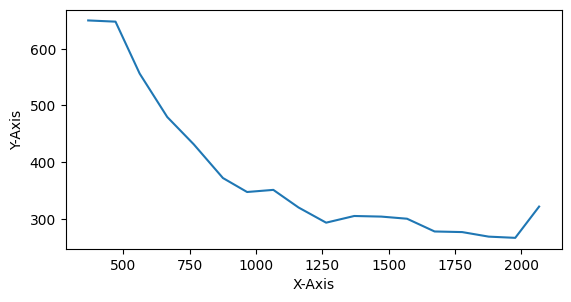

In [3]:
# Зависимость между высотой (в мм) установки маркера и его периметром на изображении (в пикселях)

import matplotlib.pyplot as plt
 
# Расстояние от камеры до объекта
h = [367, 470, 561, 665, 765, 875, 966, 1065, 1160, 
      1264, 1370, 1472, 1569, 1673, 1777, 1877, 1977, 2067]

# adding the subplots
axes1 = plt.subplot2grid (
(3, 1), (0, 0), rowspan = 2, colspan = 1)
 
# plotting the data
axes1.plot(h, sp)


# Adding label on the y-axis
plt.ylabel('Y-Axis')
 
# Adding label on the x-axis
plt.xlabel('X-Axis')
 
plt.show()

In [4]:
cv2.imshow("Image", imgWarp)
cv2.waitKey(2000)
cv2.destroyAllWindows()